<a href="https://colab.research.google.com/github/razanalharbi1/T5Week1/blob/main/Copy_of_Data_Cleaning_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Loading the dataset

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset(1).csv')

# Handling Null Values

In [ ]:
# Check for null values (1 line)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Fill null values for 'Embarked' with the mode(1 line)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# Drop rows with null values in 'Cabin' (or alternatively, you can fill it with a placeholder) (1 line)
df.dropna(subset=['Cabin'], inplace=True)

In [ ]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            19
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

# Handling Duplicates

In [ ]:
# Check for duplicates (1 line)
df.duplicated().sum() # there is no duplicates
# Drop duplicates if any (1 line)
df.drop_duplicates(inplace=True)


# Handling Outliers

<Axes: >

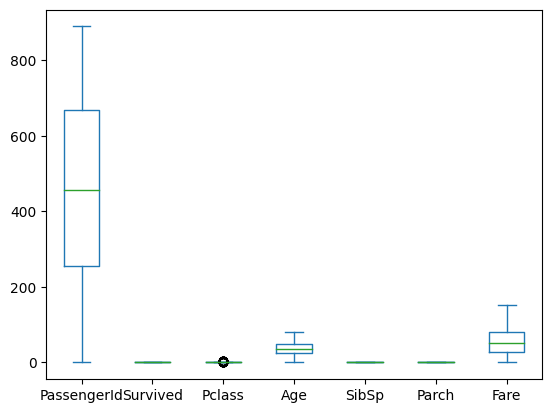

In [ ]:
import numpy as np

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Fare' using the remove_outilers function (1 line)
df = remove_outliers(df, 'Fare')
# to make sure
df.plot.box()


# Scaling and Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard scaling for 'Fare' (2 lines)
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])
# Min-Max scaling for 'Age' (2 lines)
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

# Encoding Categorical Variables

In [ ]:
# One-hot encoding for 'Embarked' and 'Sex' (1 line)
df = pd.get_dummies(df, columns=['Embarked', 'Sex'], drop_first=True)